In [1]:
!pip3 install pandas matplotlib seaborn numpy scipy

import pandas as pd
import random
import seaborn as sns 
import numpy as np
from matplotlib import pyplot as PLT

#dtypes = {'Created': 'str', 'Merged': 'str'}
parse_dates = ['Created', 'Started', 'Done']

df = pd.read_csv('OFDS.csv', parse_dates=parse_dates)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Key                       248 non-null    object        
 1   Title                     172 non-null    object        
 2   Created                   172 non-null    datetime64[ns]
 3   Status                    172 non-null    object        
 4   Story Points              172 non-null    float64       
 5   Story Points at Start     172 non-null    float64       
 6   Started                   82 non-null     datetime64[ns]
 7   Done                      91 non-null     datetime64[ns]
 8   Done.1                    91 non-null     float64       
 9   Not Started               118 non-null    float64       
 10  In Analysis               55 non-null     float64       
 11  Rejected                  19 non-null     float64       
 12  IN REVIEW UPDATE      

In [2]:
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [20, 10]

df2 = df[(df['Duration'] > 0)]
df2.head(10)


,Key,Title,Created,Status,Story Points,Story Points at Start,Started,Done,Done.1,Not Started,...,In RO,In 2nd Review,Analysing,In development,In 1st Review,Unassigned,Implementing,Blocked,In Test (including Demo),Duration
0,OFDS-74,Code change to align with Schema changes as pe...,2023-04-18,Done,3.0,3.0,2023-04-26,2023-05-09,3368.3,71.6,...,NaN,NaN,NaN,140.3,167.0,NaN,NaN,NaN,NaN,307.3
2,OFDS-75,Code change to align with Product Domain Schem...,2023-04-18,Done,1.0,1.0,2023-04-20,2023-04-24,3726.6,23.6,...,NaN,NaN,NaN,24.8,72.3,NaN,NaN,NaN,NaN,97.1
11,OFDS-4,Identify approach for Subgraph and Integration...,2023-01-24,Done,2.0,2.0,2023-02-13,2023-03-01,5018.6,620.3,...,NaN,NaN,NaN,245.4,NaN,NaN,NaN,NaN,NaN,388.4
15,OFDS-3,Data Modelling for Order Fulfilment Domain Ser...,2023-01-24,Done,3.0,3.0,2023-02-07,2023-02-15,5357.2,336.2,...,NaN,NaN,NaN,142.5,48.6,NaN,NaN,NaN,NaN,191.0
17,OFDS-72,Publish Order Fulfilment subgraph to Apollo Fe...,2023-04-13,Done,3.0,3.0,2023-04-26,2023-05-02,3530.9,142.9,...,NaN,NaN,NaN,144.0,NaN,NaN,NaN,NaN,NaN,147.7
19,OFDS-6,Authentication and authorization for Fulfilmen...,2023-01-24,Done,3.0,3.0,2023-03-06,2023-03-14,4704.7,983.0,...,NaN,NaN,NaN,171.6,NaN,NaN,NaN,NaN,24.9,196.5
21,OFDS-73,Consume ATP API from OMS - Store Collection,2023-04-17,Done,5.0,5.0,2023-05-12,2023-05-31,2845.3,429.5,...,NaN,NaN,NaN,95.6,353.9,NaN,NaN,NaN,NaN,449.5
23,OFDS-5,Project Workspace Setup - 1,2023-01-24,Done,3.0,3.0,2023-02-06,2023-02-10,5477.1,311.1,...,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,96.0
25,OFDS-78,Purge items from DB collection,2023-04-18,Done,3.0,0.0,2023-04-25,2023-04-28,3630.7,23.2,...,NaN,NaN,NaN,47.5,24.6,NaN,NaN,NaN,NaN,72.1
27,OFDS-79,Accessibility of Environment variables,2023-04-18,Done,2.0,0.0,2023-04-24,2023-04-27,3655.0,133.7,...,NaN,NaN,NaN,51.5,20.7,NaN,NaN,NaN,NaN,72.2


6141.617822966697


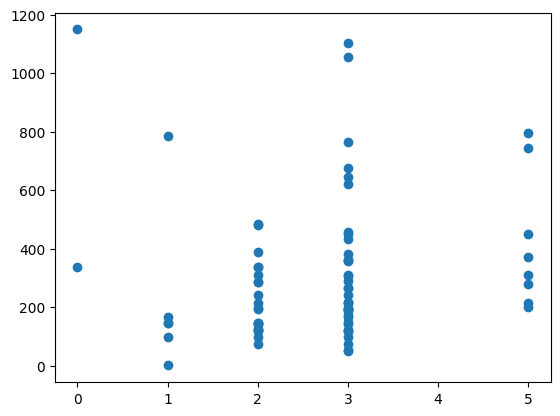

In [3]:
#df2.plot.scatter(x='Story Points', y='Duration')

xs = df2['Story Points'].tolist()
ys = df2['Duration'].tolist()

plt.scatter(xs,ys)
z = np.polyfit(xs,ys, 4)
p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

print(p(8))

plt.show()




In [4]:
#plot std  devition



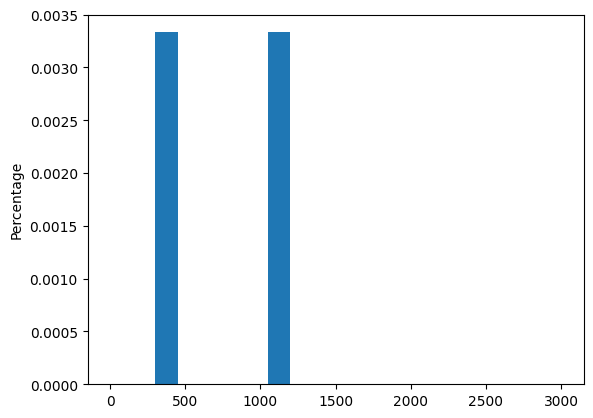

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


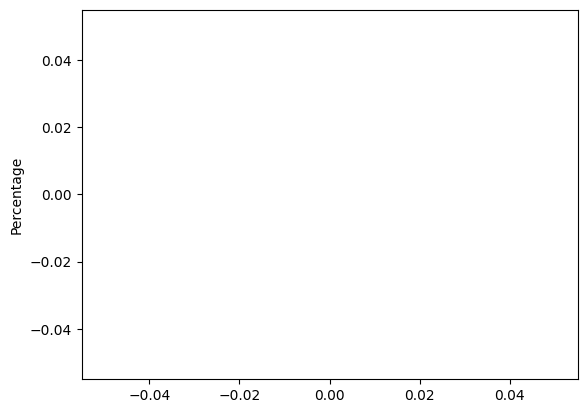

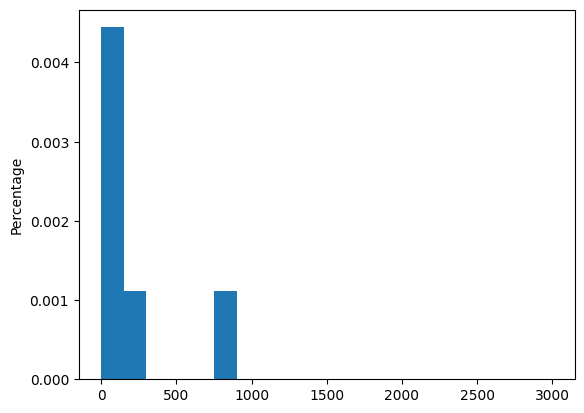

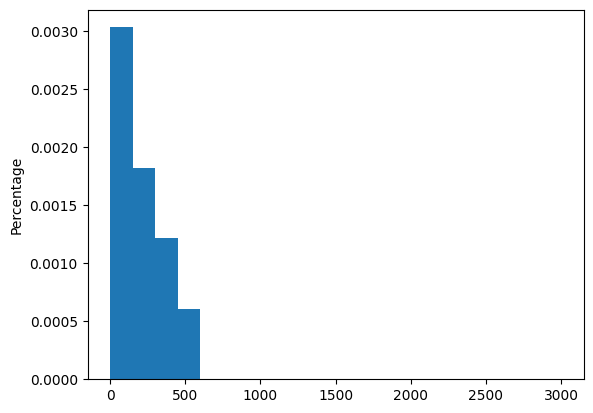

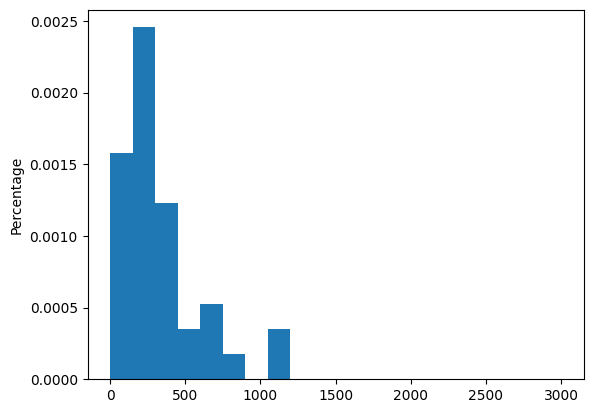

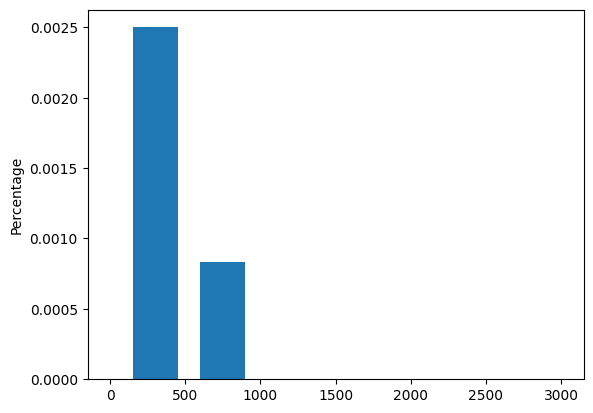

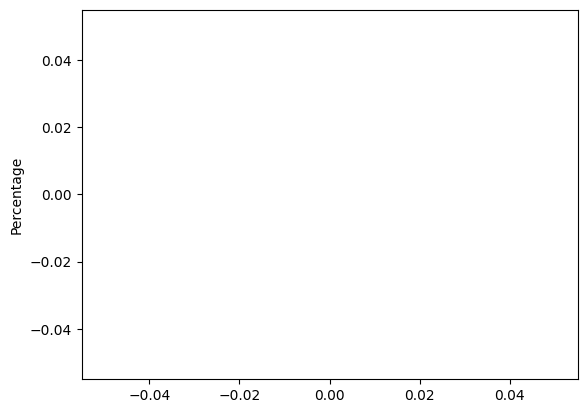

In [5]:
#print(df2.describe())
ax = None

for i in [0,0.5,1,2,3,5,8]:
    sp8 = df2[(df2['Story Points'] == i)]
    #print(sp8['Duration'].describe())
    #print(": " + str(i))
    #print(str(sp8.describe()['Duration']['50%']))
    #ax = sp8['Duration'].plot.hist(bins=20, density=True, alpha=0.5, range=[0,3000],label=i,ax=ax)
    ax = plt.hist(sp8['Duration'], bins=20, density=True, range=[0,3000], weights=np.ones(len(sp8['Duration'])) / len(sp8['Duration']) * 100)
    plt.ylabel('Percentage')
    plt.show()

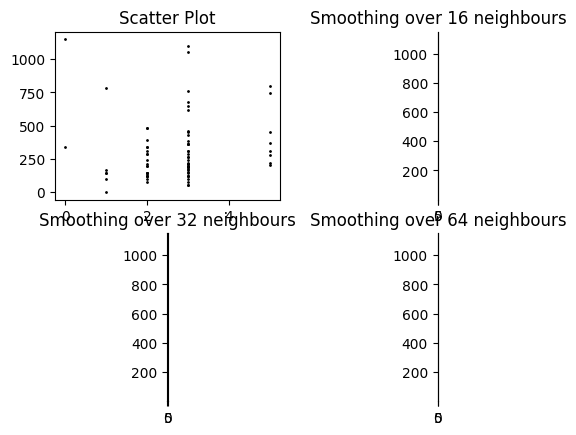

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def data_coord2view_coord(p, vlen, pmin, pmax):
    dp = pmax - pmin
    dv = (p - pmin) / dp * vlen
    return dv


def nearest_neighbours(xs, ys, reso, n_neighbours):
    im = np.zeros([reso, reso])
    extent = [np.min(xs), np.max(xs), np.min(ys), np.max(ys)]

    xv = data_coord2view_coord(xs, reso, extent[0], extent[1])
    yv = data_coord2view_coord(ys, reso, extent[2], extent[3])
    for x in range(reso):
        for y in range(reso):
            xp = (xv - x)
            yp = (yv - y)

            d = np.sqrt(xp**2 + yp**2)

            im[y][x] = 1 / np.sum(d[np.argpartition(d.ravel(), n_neighbours)[:n_neighbours]])

    return im, extent


n = 219
xs = np.random.randn(n)
ys = np.random.randn(n)

xs = df2['Story Points'].tolist()
ys = df2['Duration'].tolist()

resolution = 10

fig, axes = plt.subplots(2, 2)

for ax, neighbours in zip(axes.flatten(), [0, 16, 32, 64]):
    if neighbours == 0:
        ax.plot(xs, ys, 'k.', markersize=2)
       # ax.set_aspect('equal')
        ax.set_title("Scatter Plot")
    else:
        
        im, extent = nearest_neighbours(xs, ys, resolution, neighbours)
        ax.imshow(im, origin='lower', extent=extent, cmap=cm.jet)
        ax.set_title("Smoothing over %d neighbours" % neighbours)
       # ax.set_xlim(0,10)
        #ax.set_ylim(extent[2], extent[3])
       # ax.set_ylim(0, 1000)
plt.show()